<a href="https://colab.research.google.com/github/elainethpereira/Aprendizado-de-Maquina/blob/main/SPACEX_Missions_A2_Visualiza%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CURSO: Ciência de Dados

COMPONENTE CURRICULAR / TEMA: PROJETO E ANALISE DE VISUALIZACAO DO CONHECIMENTO

ALUNO: Elaine Thamires Pereira, RA: 10408284

PROFESSOR: Fabio Lopes



---




Análise exploratória para predição de tendencia de lançamentos de foguetes da empresa SpaceX para o ano de 2023 utizando python


Metadados do Conjunto de Dados de Missoes da SpaceX:

- Nomes das Colunas:
  - 'Flight Number', 'Launch Date': Data do lançamento', 'Launch Time', 'Launch Site', 'Vehicle Type','Payload Name': Nome da carga útil', 'Payload Type','Payload Mass (kg)', 'Payload Orbit', 'Customer Name','Customer Type', 'Customer Country', 'Mission Outcome', 'Failure Reason','Landing Type','Landing Outcome'.

- Tipos de Dados:
  Numérico (inteiro, float), Data/hora, Texto.

- Descrições das Colunas:
  - 'Flight Number': Número sequencial único atribuído a cada lançamento.
  - 'Launch Date': Data em que o lançamento ocorreu.
  - 'Launch Time': Hora em que o lançamento ocorreu.
  - 'Launch Site': Local de onde o lançamento foi realizado.
  - 'Vehicle Type': Tipo de veículo de lançamento (por exemplo, Falcon 9, Falcon Heavy).
  - 'Payload Name': Nome da carga útil transportada pelo foguete.
  - 'Payload Type': Tipo de carga útil (por exemplo, satélite, cápsula espacial).
  - 'Payload Mass (kg)': Massa da carga útil em quilogramas.
  - 'Payload Orbit': Órbita para a qual a carga útil foi lançada.
  - 'Customer Name': Nome do cliente que contratou o lançamento.
  - 'Customer Type': Tipo de cliente (por exemplo, governo, empresa privada).
  - 'Customer Country': País do cliente.
  - 'Mission Outcome': Resultado da missão (Sucesso, Falha, etc.).
  - 'Failure Reason': Motivo da falha, se houver.
  - 'Landing Type': Tipo de pouso, se aplicável (por exemplo, pouso em plataforma, pouso em solo).
  - 'Landing Outcome': Resultado do pouso, se aplicável (Sucesso, Falha, etc.).


- Origem dos Dados:
  - Os dados foram coletados através do link: https://www.kaggle.com/datasets/spacex/spacex-missions, e estão em arquivo formato CSV

- Licença e Termos de Uso:
 Desconhecida

In [68]:
from google.colab import files

# Carregar o arquivo CSV do seu computador
uploaded = files.upload()

# Obter o nome do arquivo
nome_arquivo = list(uploaded.keys())[0]

# Carregar o arquivo CSV em um DataFrame do pandas
df = pd.read_csv(nome_arquivo)




Saving spacex_missions.csv to spacex_missions (3).csv


In [69]:
# Exibir as primeiras linhas do DataFrame
df.head()

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-1,24 March 2006,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.5,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN
1,F1-2,21 March 2007,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN
2,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,NaN,NaN,ORS,Government,United States,Failure,Collision During Launch,NaN,NaN
3,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.0,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN
4,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Explorers,Human Remains,NaN,NaN,Celestis,Business,United States,Failure,Collision During Launch,NaN,NaN


## ANALISE EXPLORATORIA DOS DADOS


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flight Number      41 non-null     object 
 1   Launch Date        41 non-null     object 
 2   Launch Time        41 non-null     object 
 3   Launch Site        41 non-null     object 
 4   Vehicle Type       41 non-null     object 
 5   Payload Name       41 non-null     object 
 6   Payload Type       38 non-null     object 
 7   Payload Mass (kg)  33 non-null     float64
 8   Payload Orbit      36 non-null     object 
 9   Customer Name      39 non-null     object 
 10  Customer Type      39 non-null     object 
 11  Customer Country   39 non-null     object 
 12  Mission Outcome    41 non-null     object 
 13  Failure Reason     8 non-null      object 
 14  Landing Type       28 non-null     object 
 15  Landing Outcome    21 non-null     object 
dtypes: float64(1), object(15)
me

In [132]:
df.shape #quantidade linhas e colunas

(41, 18)

In [71]:
df.describe() #exibe as metricas dos dados como medias e minimos e maximos dos dados numericos

,Payload Mass (kg)
count,33.000000
mean,2739.772727
std,2131.502973
min,8.000000
25%,570.000000
50%,2490.000000
75%,4159.000000
max,9600.000000


In [72]:
df.isnull().sum() #quantidade de dados nulos

Flight Number         0
Launch Date           0
Launch Time           0
Launch Site           0
Vehicle Type          0
Payload Name          0
Payload Type          3
Payload Mass (kg)     8
Payload Orbit         5
Customer Name         2
Customer Type         2
Customer Country      2
Mission Outcome       0
Failure Reason       33
Landing Type         13
Landing Outcome      20
dtype: int64

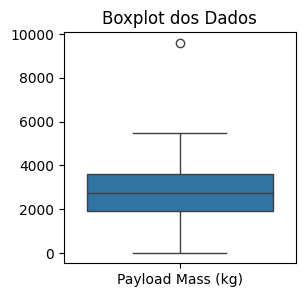

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para identificar outliers
plt.figure(figsize=(3, 3))
sns.boxplot(data=df)
plt.title('Boxplot dos Dados')
plt.show()

In [75]:
nomes_colunas = df.columns
print(nomes_colunas)

Index(['Flight Number', 'Launch Date', 'Launch Time', 'Launch Site',
       'Vehicle Type', 'Payload Name', 'Payload Type', 'Payload Mass (kg)',
       'Payload Orbit', 'Customer Name', 'Customer Type', 'Customer Country',
       'Mission Outcome', 'Failure Reason', 'Landing Type', 'Landing Outcome'],
      dtype='object')


In [76]:
# dicionário de mapeamento para os novos nomes das colunas
novo_nome_colunas = {
    'Flight Number': 'numero_voo',
    'Launch Date': 'data_lancamento',
    'Launch Time': 'hora_lancamento',
    'Launch Site': 'local_lancamento',
    'Vehicle Type': 'tipo_veiculo',
    'Payload Name': 'nome_carga_util',
    'Payload Type': 'tipo_carga_util',
    'Payload Mass (kg)': 'massa_carga_util_kg',
    'Payload Orbit': 'orbita_carga_util',
    'Customer Name': 'nome_cliente',
    'Customer Type': 'tipo_cliente',
    'Customer Country': 'pais_cliente',
    'Mission Outcome': 'resultado_missao',
    'Failure Reason': 'motivo_falha',
    'Landing Type': 'tipo_pouso',
    'Landing Outcome': 'resultado_pouso'
}

# Renomear as colunas
df = df.rename(columns=novo_nome_colunas)

# Verificar as colunas renomeadas
print(df.columns)


Index(['numero_voo', 'data_lancamento', 'hora_lancamento', 'local_lancamento',
       'tipo_veiculo', 'nome_carga_util', 'tipo_carga_util',
       'massa_carga_util_kg', 'orbita_carga_util', 'nome_cliente',
       'tipo_cliente', 'pais_cliente', 'resultado_missao', 'motivo_falha',
       'tipo_pouso', 'resultado_pouso'],
      dtype='object')


In [77]:
print(df.dtypes)

numero_voo              object
data_lancamento         object
hora_lancamento         object
local_lancamento        object
tipo_veiculo            object
nome_carga_util         object
tipo_carga_util         object
massa_carga_util_kg    float64
orbita_carga_util       object
nome_cliente            object
tipo_cliente            object
pais_cliente            object
resultado_missao        object
motivo_falha            object
tipo_pouso              object
resultado_pouso         object
dtype: object


Identicada a necessidade de converter os tipos das colunas para tornar o dataset mais facil para trabalhar, utilizada a funcao "astype" da biblioteca pandas, conforme abaixo:

In [86]:
# Convertendo os tipos das colunas
import pandas as pd
df['data_lancamento'] = pd.to_datetime(df['data_lancamento'])
df['hora_lancamento'] = pd.to_datetime(df['hora_lancamento'], format='%H:%M:%S').dt.time  # Converte para hora
df['local_lancamento'] = df['local_lancamento'].astype('category')  # Converte para categoria
df['tipo_veiculo'] = df['tipo_veiculo'].astype('category')  # Converte para categoria
df['nome_carga_util'] = df['nome_carga_util'].astype('category')  # Converte para categoria
df['tipo_carga_util'] = df['tipo_carga_util'].astype('category')  # Converte para categoria
df['massa_carga_util_kg'] = df['massa_carga_util_kg'].astype('float')  # Converte para float
df['orbita_carga_util'] = df['orbita_carga_util'].astype('category')  # Converte para categoria
df['nome_cliente'] = df['nome_cliente'].astype('category')  # Converte para categoria
df['tipo_cliente'] = df['tipo_cliente'].astype('category')  # Converte para categoria
df['pais_cliente'] = df['pais_cliente'].astype('category')  # Converte para categoria
df['resultado_missao'] = df['resultado_missao'].astype('category')  # Converte para categoria
df['motivo_falha'] = df['motivo_falha'].astype('category')  # Converte para categoria
df['tipo_pouso'] = df['tipo_pouso'].astype('category')  # Converte para categoria
df['resultado_pouso'] = df['resultado_pouso'].astype('category')  # Converte para categoria

# Mostrar os tipos das colunas após a conversão
print(df.dtypes)


numero_voo                     object
data_lancamento        datetime64[ns]
hora_lancamento                object
local_lancamento             category
tipo_veiculo                 category
nome_carga_util              category
tipo_carga_util              category
massa_carga_util_kg           float64
orbita_carga_util            category
nome_cliente                 category
tipo_cliente                 category
pais_cliente                 category
resultado_missao             category
motivo_falha                 category
tipo_pouso                   category
resultado_pouso              category
dtype: object


In [107]:
df.head(5)

,numero_voo,data_lancamento,hora_lancamento,local_lancamento,tipo_veiculo,nome_carga_util,tipo_carga_util,massa_carga_util_kg,orbita_carga_util,nome_cliente,tipo_cliente,pais_cliente,resultado_missao,motivo_falha,tipo_pouso,resultado_pouso
0,F1-1,2006-03-24,22:30:00,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.500000,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN
1,F1-2,2007-03-21,01:10:00,Marshall Islands,Falcon 1,DemoSat,NaN,2739.772727,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN
2,F1-3,2008-08-03,03:34:00,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,2739.772727,NaN,ORS,Government,United States,Failure,Collision During Launch,NaN,NaN
3,F1-3,2008-08-03,03:34:00,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.000000,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN
4,F1-3,2008-08-03,03:34:00,Marshall Islands,Falcon 1,Explorers,Human Remains,2739.772727,NaN,Celestis,Business,United States,Failure,Collision During Launch,NaN,NaN


No trecho abaixo foi eliminada as colunas que não seriam trabalhadas:

In [116]:
# Drop de colunas que nao serão usadas
df_colunas_selecionadas = df.drop(columns=['numero_voo', 'orbita_carga_util', 'tipo_pouso', 'resultado_pouso'])


# Verificar o DataFrame resultante
df_colunas_selecionadas.head()


,data_lancamento,hora_lancamento,local_lancamento,tipo_veiculo,nome_carga_util,tipo_carga_util,massa_carga_util_kg,nome_cliente,tipo_cliente,pais_cliente,resultado_missao,motivo_falha
0,2006-03-24,22:30:00,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.500000,DARPA,Government,United States,Failure,Engine Fire During Launch
1,2007-03-21,01:10:00,Marshall Islands,Falcon 1,DemoSat,NaN,2739.772727,DARPA,Government,United States,Failure,Engine Shutdown During Launch
2,2008-08-03,03:34:00,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,2739.772727,ORS,Government,United States,Failure,Collision During Launch
3,2008-08-03,03:34:00,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.000000,NASA,Government,United States,Failure,Collision During Launch
4,2008-08-03,03:34:00,Marshall Islands,Falcon 1,Explorers,Human Remains,2739.772727,Celestis,Business,United States,Failure,Collision During Launch


In [117]:
# Calcular a soma dos números de falha e sucesso na coluna 'resultado_missao'
soma_resultado_missao = df.groupby('resultado_missao').size()

# Verificar os números de falha e sucesso
print("Número de falhas:", soma_resultado_missao['Failure'])
print("Número de sucessos:", soma_resultado_missao['Success'])


Número de falhas: 8
Número de sucessos: 33


A analise abaixo foi feita para ajudar a entender se diferentes tipos de veiculos apresentam diferentes tipos de falhas ou se há variações. O que foi constatado, não há um padrão, o que infere que o tipo de veículo nao interfere no tipo de falha.

In [122]:
# Filtrar o DataFrame para obter apenas as entradas de falha
df_failures = df[df['resultado_missao'] == 'Failure']

# Selecionado as colunas relevantes
df_failures = df_failures[['tipo_veiculo', 'data_lancamento', 'motivo_falha']]

df_failures.head(10)


,tipo_veiculo,data_lancamento,motivo_falha
0,Falcon 1,2006-03-24,Engine Fire During Launch
1,Falcon 1,2007-03-21,Engine Shutdown During Launch
2,Falcon 1,2008-08-03,Collision During Launch
3,Falcon 1,2008-08-03,Collision During Launch
4,Falcon 1,2008-08-03,Collision During Launch
11,Falcon 9 (v1.0),2012-10-08,Engine Failure During Flight
27,Falcon 9 (v1.1),2015-06-28,Vehicle Explosion During Flight
38,Falcon 9 Full Thrust (v1.2),2016-09-01,Vehicle Explosion Before Launch


No gráfico a seguir podemos observar que o maior motivo de falha nas missões é devido a Colisoes durante o lançamento

<ipython-input-188-06e52bc80d8d>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


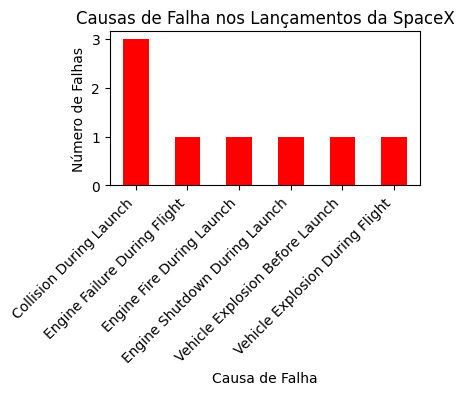

In [188]:
import pandas as pd
import matplotlib.pyplot as plt


# Filtrar os lançamentos que resultaram em falha
falhas = df[df['resultado_missao'] == 'Failure']

# Contar a frequência de cada causa de falha
causas_falhas = falhas['motivo_falha'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(4, 2))
causas_falhas.plot(kind='bar', color='red')

# Adicionar títulos e rótulos
plt.title('Causas de Falha nos Lançamentos da SpaceX')
plt.xlabel('Causa de Falha')
plt.ylabel('Número de Falhas')

# Mostrar o gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [123]:
# Agrupando os dados por 'local_lancamento' e 'resultado_missao' para obter o numero de ocorrencias positivas ou negativas para cada localidade de lançamento
df_contagem_lancamentos = df.groupby(['local_lancamento', 'resultado_missao']).size().reset_index(name='quantidade de lançamentos')

print(df_contagem_lancamentos)


              local_lancamento resultado_missao  quantidade de lançamentos
0     Cape Canaveral AFS LC-40          Failure                          3
1     Cape Canaveral AFS LC-40          Success                         27
2  Kennedy Space Center LC-39A          Failure                          0
3  Kennedy Space Center LC-39A          Success                          1
4             Marshall Islands          Failure                          5
5             Marshall Islands          Success                          2
6        Vandenberg AFB SLC-4E          Failure                          0
7        Vandenberg AFB SLC-4E          Success                          3


In [124]:
# Extrair o ano da coluna 'data_lancamento'
df['ano_lancamento'] = df['data_lancamento'].dt.year

# Contar o número de lançamentos por ano
contagem_lancamentos_por_ano = df['ano_lancamento'].value_counts().sort_index()

# Exibir o resultado
print(contagem_lancamentos_por_ano)


2006     1
2007     1
2008     4
2009     1
2010     2
2012     3
2013     3
2014     6
2015     8
2016    10
2017     2
Name: ano_lancamento, dtype: int64


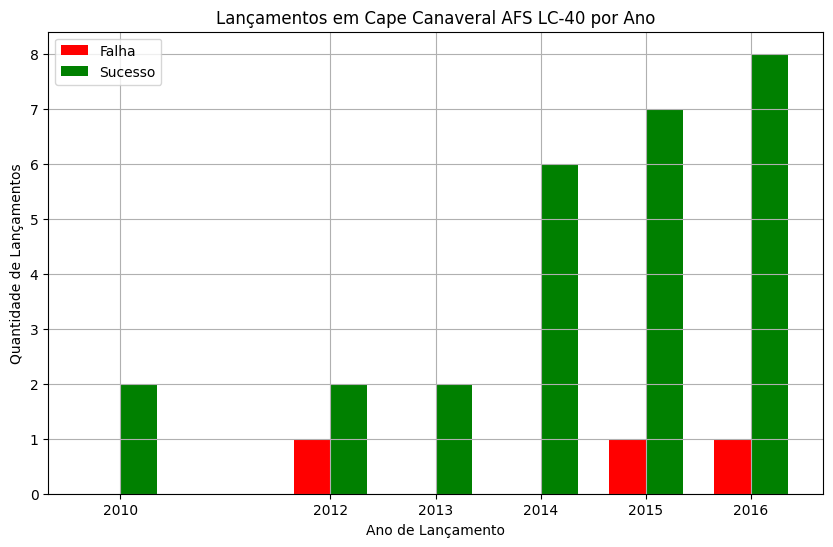

In [185]:
import matplotlib.pyplot as plt

# Filtrando os dados para incluir apenas o local "Cape Canaveral AFS LC-40"
dados_cape_canaveral = df[df['local_lancamento'] == 'Cape Canaveral AFS LC-40']

# Agrupar os dados por ano de lançamento e contabilizar os lançamentos bem-sucedidos e mal-sucedidos
agrupado_por_ano = dados_cape_canaveral.groupby([dados_cape_canaveral['data_lancamento'].dt.year, 'resultado_missao']).size().unstack(fill_value=0)

# Plotar o gráfico de barras com duas barras lado a lado
plt.figure(figsize=(10, 6))

largura_barra = 0.35

anos = agrupado_por_ano.index

plt.bar(anos - largura_barra/2, agrupado_por_ano['Failure'], width=largura_barra, color='red', label='Falha')
plt.bar(anos + largura_barra/2, agrupado_por_ano['Success'], width=largura_barra, color='green', label='Sucesso')

plt.title('Lançamentos em Cape Canaveral AFS LC-40 por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade de Lançamentos')
plt.xticks(anos)
plt.legend()

plt.grid(True)
plt.show()




<ipython-input-177-e8fb41cd05fd>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dados_2016['data_lancamento'], shade=True, color='blue')


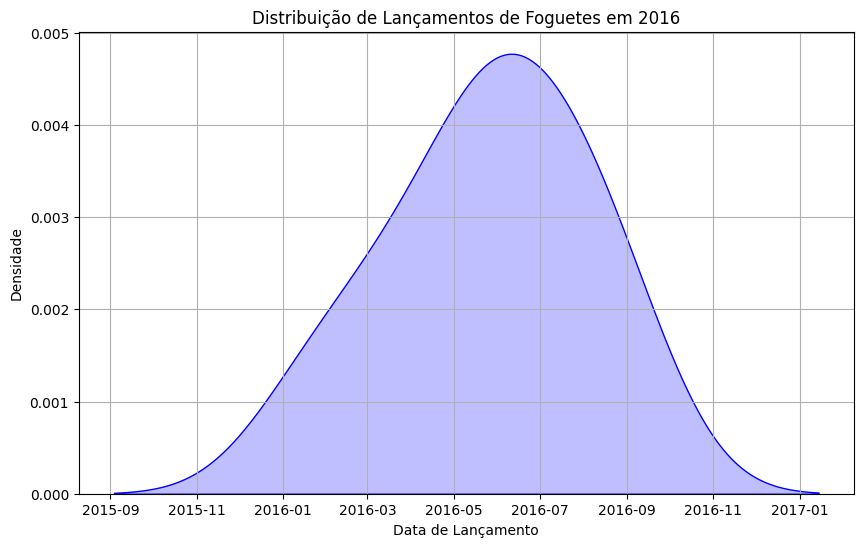

In [177]:
import seaborn as sns

# Filtrar os dados para incluir apenas os lançamentos de 2016
dados_2016 = df[df['data_lancamento'].dt.year == 2016]

# gráfico de distribuição
plt.figure(figsize=(10, 6))
sns.kdeplot(dados_2016['data_lancamento'], shade=True, color='blue')

plt.title('Distribuição de Lançamentos de Foguetes em 2016')
plt.xlabel('Data de Lançamento')
plt.ylabel('Densidade')

plt.grid(True)
plt.show()




Abaixo podemos conferir o grafico de linha que exibe a quantidade de lançamentos seja com falha ou não durante os anos

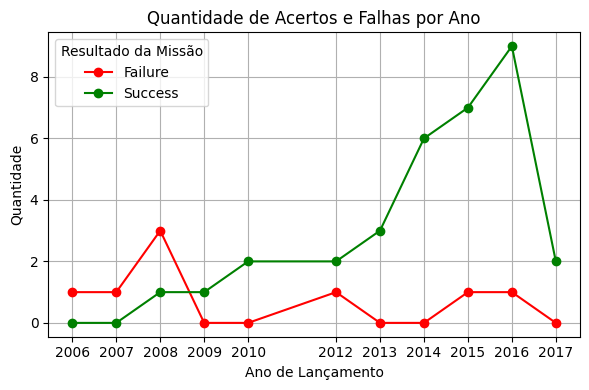

In [131]:
#plot de gráfico de linhas com a quantidade de acertos e falhas ao longo dos anos

import matplotlib.pyplot as plt

# Agrupar os dados por ano e resultado da missão e contar o número de ocorrências
contagem_missao_por_ano = df.groupby(['ano_lancamento', 'resultado_missao']).size().unstack(fill_value=0)

# Plotar o gráfico de linhas
ax = contagem_missao_por_ano.plot(kind='line', marker='o', figsize=(6, 4))

# Definir cores para sucesso (verde) e falha (vermelho)
ax.lines[0].set_color('red')
ax.lines[1].set_color('green')

# Adicionar rótulos e título
plt.title('Quantidade de Acertos e Falhas por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade')
plt.grid(True)
plt.xticks(contagem_missao_por_ano.index)
plt.legend(title='Resultado da Missão')

# Exibir o gráfico
plt.tight_layout()
plt.show()



Na analise de correlação entre o tipo do veículo e o resultado de sua missão, observou-se que o Falcon1 apresentou mais falhas que acertos, o que é de se esperar, já que nas versões seguintes provavelmente os motivos das falhas já foram estudados e corrigidos a fim de reduzir a taxa de falhas

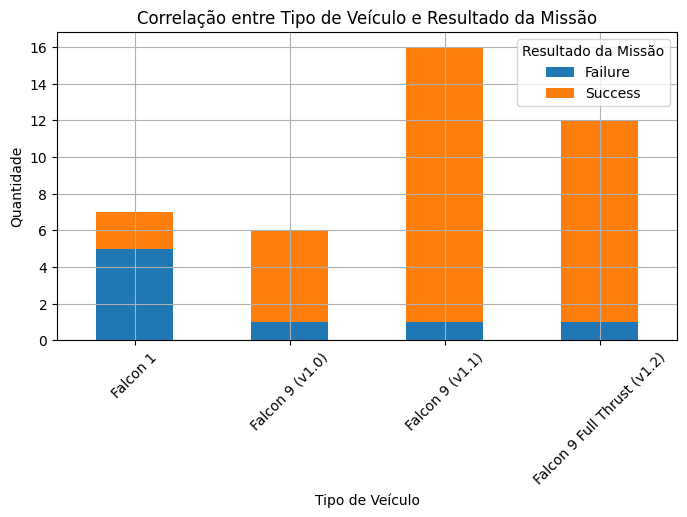

In [136]:
# 1. Correlação entre Tipo de Veículo e Resultado da Missão
contagem_missao_por_veiculo = df.groupby(['tipo_veiculo', 'resultado_missao']).size().unstack(fill_value=0)
contagem_missao_por_veiculo.plot(kind='bar', stacked=True, figsize=(8, 4))
plt.title('Correlação entre Tipo de Veículo e Resultado da Missão')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Quantidade')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Resultado da Missão')

Aqui foi plotado um gráfico de Série temporal sobre os lançamentos de foguetes durante os anos, e apresentado sua média movel. Esses dados colaboram para entender a tendencia de lançamentos e uma possivel previsão para os proximos anos.

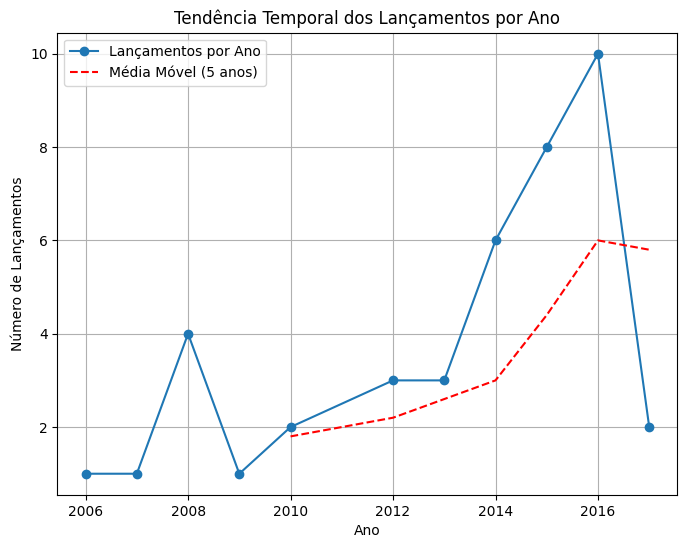

In [149]:
import matplotlib.pyplot as plt

# Calcular a média móvel dos lançamentos por ano
janela_media_movel = 5  # Tamanho da janela da média móvel
media_movel = df['data_lancamento'].dt.year.value_counts().sort_index().rolling(window=janela_media_movel).mean()

# Plotar os lançamentos por ano e a média móvel
plt.figure(figsize=(8, 6))
plt.plot(df['data_lancamento'].dt.year.value_counts().sort_index(), marker='o', linestyle='-', label='Lançamentos por Ano')
plt.plot(media_movel, marker='', linestyle='--', color='red', label=f'Média Móvel ({janela_media_movel} anos)')
plt.title('Tendência Temporal dos Lançamentos por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Lançamentos')
plt.legend()
plt.grid(True)
plt.show()


No código abaixo, foi empregada a regressão linear para analisar a tendência dos lançamentos de foguetes da SpaceX ao longo dos anos. Primeiro, calculamos o número de lançamentos por ano a partir dos dados históricos. Em seguida, treinamos um modelo de regressão linear com esses dados e fazemos uma previsão para o número de lançamentos em 2023. Por fim, foi plotado um grafico com os dados históricos e a linha de tendência prevista até 2023, permitindo visualizar a tendência dos lançamentos ao longo do tempo.

Erro RMSE do modelo de regressão linear nos dados de treinamento: 2.48


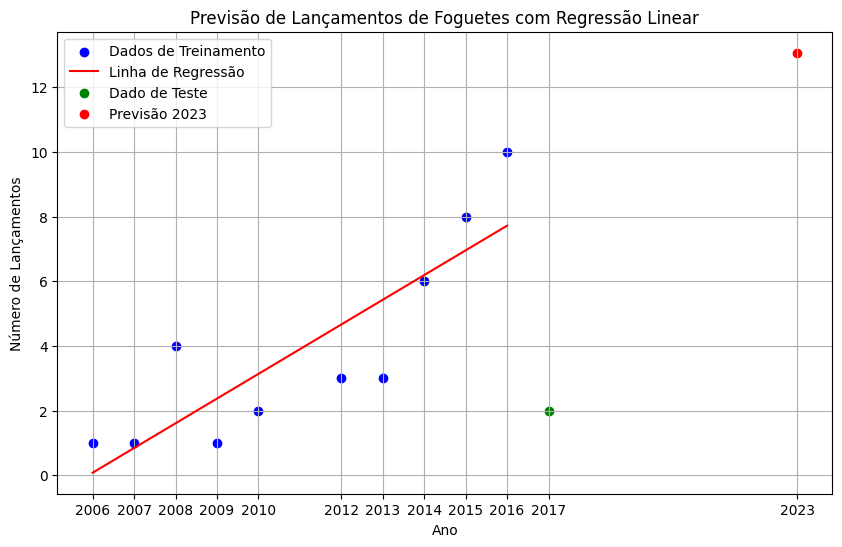

Previsão de lançamentos de foguetes para 2023: 13


In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Preparar os dados
historico_lancamentos = df['data_lancamento'].dt.year.value_counts().sort_index()
anos = historico_lancamentos.index.values.reshape(-1, 1)
num_lancamentos = historico_lancamentos.values

# Dividir os dados em conjuntos de treinamento e teste
X_train, y_train = anos[:-1], num_lancamentos[:-1]
X_test, y_test = anos[-1:], num_lancamentos[-1:]

# Criar e treinar o modelo de regressão linear
modelo_regressao = LinearRegression()
modelo_regressao.fit(X_train, y_train)

# Fazer previsões
previsao_2023 = modelo_regressao.predict([[2023]])

# Avaliar o desempenho do modelo
y_pred_train = modelo_regressao.predict(X_train)
erro_treinamento = mean_squared_error(y_train, y_pred_train)
print(f'Erro RMSE do modelo de regressão linear nos dados de treinamento: {erro_treinamento:.2f}')

anos_extendidos = np.append(anos.flatten(), [2023])

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Dados de Treinamento')
plt.plot(X_train, y_pred_train, color='red', label='Linha de Regressão')
plt.scatter(X_test, y_test, color='green', label='Dado de Teste')
plt.scatter([2023], previsao_2023, color='red', label='Previsão 2023')
plt.title('Previsão de Lançamentos de Foguetes com Regressão Linear')
plt.xlabel('Ano')
plt.ylabel('Número de Lançamentos')
plt.legend()
plt.xticks(anos_extendidos.astype(int))
plt.grid(True)
plt.show()

print(f'Previsão de lançamentos de foguetes para 2023: {previsao_2023[0]:.0f}')


**Com essas análises concluí-se que**

1.   Tendencia:
Com base na previsão de 13 lançamentos de foguetes para o ano de 2023, feita pelo modelo de regressão linear, podemos interpretar a tendência como uma continuação do crescimento no número de lançamentos ao longo do tempo. Isso sugere que, de acordo com os dados históricos disponíveis, a SpaceX continuará aumentando sua taxa de lançamentos até o ano de 2023.

2.   Sazonalidade:
Não foram observados padroes de sazonalidade, observou-se apenas que no ano onde mais houveram lançamentos com sucesso, em 2016, foi no periodo entre os meses de maio e julho, que no hemisferio norte passa pela estação verão nesse intervalo. Mas é sabido que em regioes de forte calores, como é o caso da localidade de Cape Canavenal (Florida - EUA) no verão há mais indices de fortes tempestades, o que pode atrapalhar lançamentos deste tipo. Logo entendo que os dados contido no dataset nao foram suficientes para concluir um estudo sobre sazonalidade.

3. Aleatoriedade dos dados:
Ao analisar o conjunto de dados, é possível identificar a presença da aleatoriedade Essas variações não sistemáticas não podem ser atribuídas diretamente a tendências de longo prazo ou padrões sazonais, mas sim a uma série de fatores imprevisíveis e não controláveis. Por exemplo, mesmo que observemos uma tendência geral de aumento no número de lançamentos ao longo dos anos, é evidente que existem oscilações e desvios inesperados em determinados períodos. Essas flutuações podem ser resultado de uma variedade de eventos aleatórios, como problemas técnicos durante a preparação do lançamento, ou até mesmo o período da pandemia de Covid-19 que assolou o planeta entre 2019 a 2022, gerando diversas interrupções e investimentos inclusive na área de exploração espacial. Como o dataset acessado possui somentos dados até o ano de 2017, não foi possivel afirmar com certeza, mas em 2017 já observamos uma queda brusca em comparação a 2016.





